<a href="https://colab.research.google.com/github/Stepeech/DataMining/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%968_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №8. Random forest**

# Задание 1. Обучите классификатор Random Forest для решения задачи бинарной классификации: для каждого человека научиться предсказывать, выживет ли он при крушении Титаника.

Ссылка на датасет: https://www.kaggle.com/c/titanic/data

## 1. Устанавливаем зависимости

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

## 2. Импортируем датасет

In [ ]:
data = pd.read_csv("https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv")
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## 3. Производим разведовательный анализ данных


Получим представление о данных в датасете:

In [ ]:
print(data.describe())
print(data.info())
print(data['Survived'].value_counts())

         Survived      Pclass         Age  Siblings/Spouses Aboard  \
count  887.000000  887.000000  887.000000               887.000000   
mean     0.385569    2.305524   29.471443                 0.525366   
std      0.487004    0.836662   14.121908                 1.104669   
min      0.000000    1.000000    0.420000                 0.000000   
25%      0.000000    2.000000   20.250000                 0.000000   
50%      0.000000    3.000000   28.000000                 0.000000   
75%      1.000000    3.000000   38.000000                 1.000000   
max      1.000000    3.000000   80.000000                 8.000000   

       Parents/Children Aboard       Fare  
count               887.000000  887.00000  
mean                  0.383315   32.30542  
std                   0.807466   49.78204  
min                   0.000000    0.00000  
25%                   0.000000    7.92500  
50%                   0.000000   14.45420  
75%                   0.000000   31.13750  
max              

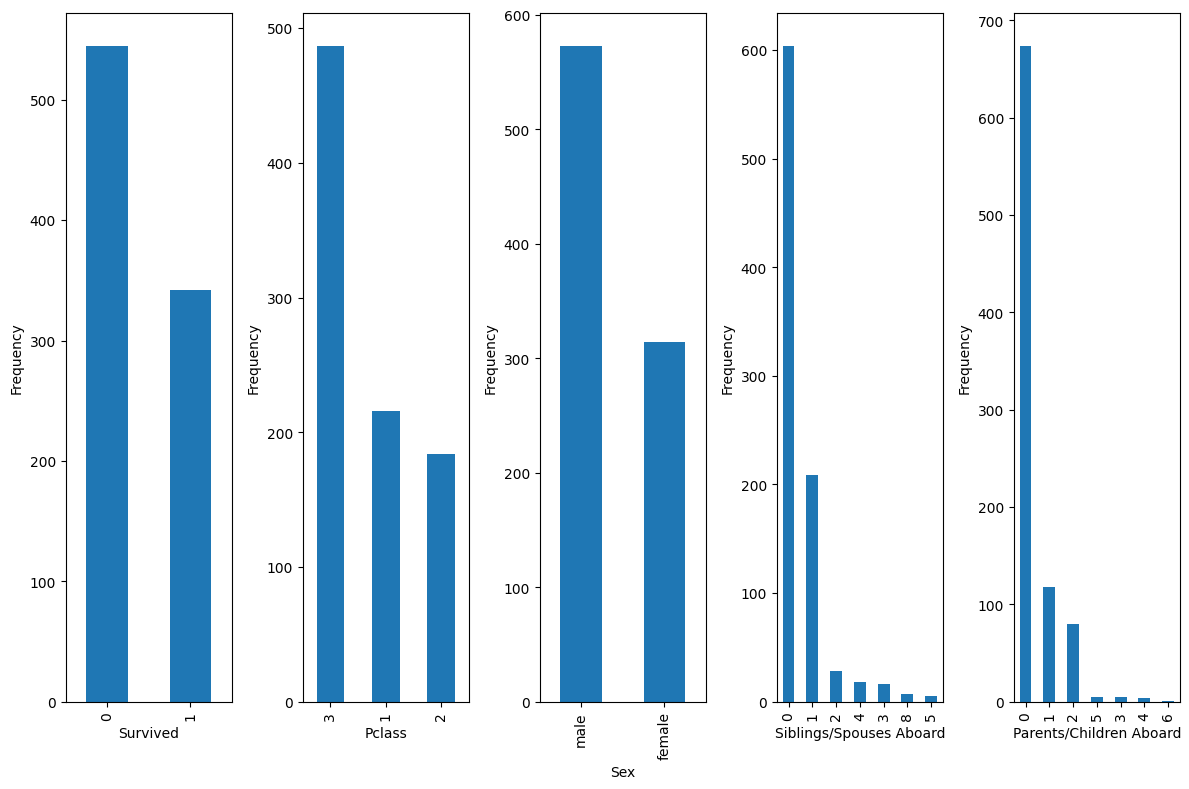

In [ ]:
col_names = ['Survived', 'Pclass', 'Sex', 'Siblings/Spouses Aboard', 'Parents/Children Aboard']

fig, axs = plt.subplots(1, 5, figsize=(12, 8))

for i, col in enumerate(col_names):
    ax = axs[i]
    data[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Сформируем обучающую и тестовую выборки:


In [ ]:
X = data.drop(['Survived'], axis=1)
y = data['Survived']
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## 5. Feature Engineering

Поработаем с признаками, выделим важные, изменим форму их представления (при надобности)

In [ ]:
# Ваш код

## 6. Построение базовой модели:

In [ ]:
rfс = RandomForestClassifier(random_state=1)
rfс.fit(X_train, y_train)

y_pred = rfс.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.8370786516853933


In [ ]:
X = data.drop(['Survived'], axis=1)
X = X.drop(['Name'], axis=1)

X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

rfс_without_names = RandomForestClassifier(random_state=1)
rfс_without_names.fit(X_train, y_train)

y_pred = rfс_without_names.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.797752808988764


*Имя положительно влияет на работу модели?* 🤔

*Спойлер: нет)*

## 7. Оценка точности модели:

### 7.1. Напишите функцию, принимающую на вход аргументы y_pred, y_test и выполняющую визуализацию матрицы ошибок и отчета классификации

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def report(y_pred, y_test):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues", cbar=False, xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("Отчёт о классификации:")
    print(classification_report(y_test, y_pred))

### 7.2. Оцените точность модели:

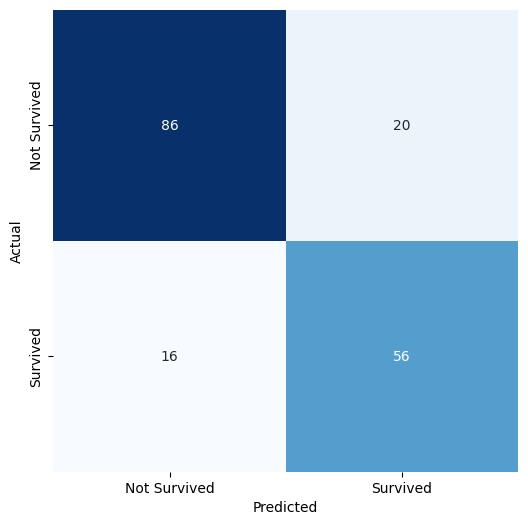

Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       106
           1       0.74      0.78      0.76        72

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



In [ ]:
report(y_pred, y_test)

## 8. Тюнинг гиперпараметров модели:

RandomSearchCV

Fitting 4 folds for each of 200 candidates, totalling 800 fits
Best paramters: {'n_estimators': 400, 'max_leaf_nodes': 61, 'max_depth': 400})
Оценка точности модели при подборе параметров с помощью RandomizedSearchCV 0.8426966292134831


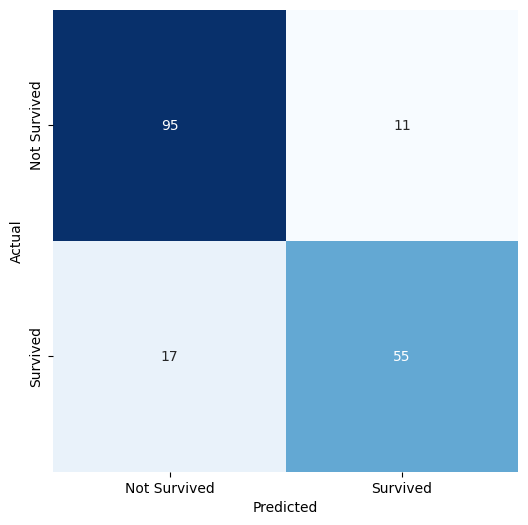

Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       106
           1       0.83      0.76      0.80        72

    accuracy                           0.84       178
   macro avg       0.84      0.83      0.83       178
weighted avg       0.84      0.84      0.84       178



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

n_estimators = [int(x) for x in np.linspace(start=400, stop=550, num=10)]
max_depth = [int(x) for x in np.linspace(250, 550, num=5)]
max_depth.append(None)
max_leaf_nodes = [int(i) for i in range(50, 120)]

# Определение пространства гиперпараметров
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
}

# Определение модели классификатора
rf_clf = RandomForestClassifier(random_state=0)

# Определение объекта RandomizedSearchCV
rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='accuracy',
    param_distributions=random_grid,
    n_iter=200,
    cv=4,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Обучение модели с перебором гиперпараметров
rf_cv.fit(X_train, y_train)

# Получение оптимальных гиперпараметров
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

# Использование оптимальных гиперпараметров в классификаторе
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(f'Оценка точности модели при подборе параметров с помощью RandomizedSearchCV {accuracy_score(y_test, y_pred)}')

report(y_pred, y_test)

GridSearchCV

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 78, 'max_leaf_nodes': 65, 'min_samples_leaf': 5, 'n_estimators': 365}
Оценка точности модели при подборе параметров с помощью GridSearchCV 0.848314606741573


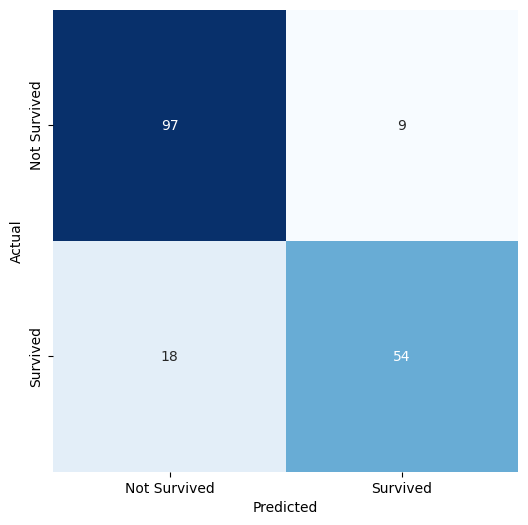

Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       106
           1       0.86      0.75      0.80        72

    accuracy                           0.85       178
   macro avg       0.85      0.83      0.84       178
weighted avg       0.85      0.85      0.85       178



In [ ]:
from sklearn.model_selection import GridSearchCV

n_estimators = [365]
max_depth = [78, 80, 82]
min_samples_leaf = [3, 4, 5]
max_depth.append(None)
max_leaf_nodes = [65, 70, 75]

params_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'min_samples_leaf': min_samples_leaf
}

rf_clf = RandomForestClassifier(random_state=0)

rf_cv = GridSearchCV(
    rf_clf,
    params_grid,
    scoring="accuracy",
    cv=5,
    verbose=1,
    n_jobs=-1
)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print(f'Оценка точности модели при подборе параметров с помощью GridSearchCV {accuracy_score(y_test, y_pred)}')

report(y_pred, y_test)

## 9. Оценка лучшей модели:

Точность модели при удалении признака Name: **79,77%**

Точность модели без удаления признака Name: **83,70%**

Точность модели при подборе параметров с помощью RandomizedSearchCV с удалением Name: **84,27%**

Точность модели при подборе параметров с помощью GridSearchCV c удалением Name: **84,83%**

Точность модели при подборе параметров с помощью GridSearchCV без удаления Name: **59,43%**

# Задание 2. Решите задачу из предыдущего пункта используя другие, ранее пройденные классификаторы. Сравните их точность предсказания с Random Forest

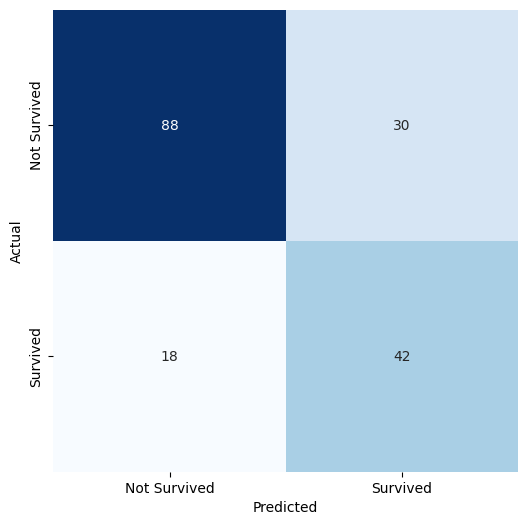

Отчёт о классификации:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       118
           1       0.58      0.70      0.64        60

    accuracy                           0.73       178
   macro avg       0.71      0.72      0.71       178
weighted avg       0.75      0.73      0.74       178

Точность KNN: 0.7303370786516854
Точность Random Forest: 0.848314606741573


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

y_pred_knn = knn_classifier.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)

report(y_test, y_pred_knn)

print(f"Точность KNN: {accuracy_knn}")
print(f"Точность Random Forest: {accuracy}")

# Задание 2.1*. Реализуйте функцию, для взаимодействия с обученной Вами моделью

* Функция должна принимать на вход обученную модель классификатора;

* После вызова функции, у пользователя через консоль запрашиваются значения признаков. При запросе значений нужно вывести пояснения о типе и диапазоне возможных значений. Также реализуйте обработку исключений;

* После ввода значений для всех признаков в консоль, выводится результат работы классификатора.

In [ ]:
final_model = RandomForestClassifier(random_state=5, max_depth = 78, max_leaf_nodes = 65, min_samples_leaf = 5, n_estimators = 365)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy}")

Точность: 0.848314606741573


In [ ]:
def deadoralive(final_model):
    features = ['Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
    feature_values = []

    for feature in features:
        while True:
            try:
                if feature == 'Sex':
                    value = input(f"Введите ваш пол (m/f): ").strip().lower()
                    if value not in ['m', 'f']:
                        raise ValueError("Пожалуйста, введите m для 'male' или f для 'female'")
                    elif value == 'm':
                        value = 'male'
                    else:
                        value = 'female'
                elif feature == 'Pclass':
                    value = int(input("Введите ваш класс числом (1/2/3): "))
                    if value not in [1, 2, 3]:
                        raise ValueError("Пожалуйста, введите '1' или '2' или '3'")
                elif feature == 'Age':
                    value = float(input("Введите ваш возраст одним числом: "))
                elif feature == 'Siblings/Spouses Aboard':
                    value = int(input("Введите количество братьев/сестер/супругов вместе с вами одним числом: "))
                elif feature == 'Parents/Children Aboard':
                    value = int(input("Введите количество родителей или детей вместе с вами одним числом: "))
                elif feature == 'Fare':
                    value = float(input("Введите стоимость вашего билета одним числом: "))
                break
            except ValueError as e:
                print(f"Ошибка: {e}")

        feature_values.append(value)

    prediction_features = pd.DataFrame([feature_values], columns=features)
    prediction_features = pd.get_dummies(prediction_features)



    missing_features = set(X.columns) - set(prediction_features.columns)
    if missing_features:
        for feature in missing_features:
           prediction_features[feature] = 0



    #print(prediction_features)
    #print(X_test)

    prediction = final_model.predict(prediction_features)
    if prediction[0] == 1:
        print("\n🎉 Согласно предсказанию, вы бы выжили на Титанике 🎉")
    else:
        print("\n☠️ Согласно предсказанию, вы бы не выжили на Титанике ☠️")




In [ ]:
deadoralive(final_model)

Введите ваш класс числом (1/2/3): 1
Введите ваш пол (m/f): f
Введите ваш возраст одним числом: 23
Введите количество братьев/сестер/супругов вместе с вами одним числом: 1
Введите количество родителей или детей вместе с вами одним числом: 1
Введите стоимость вашего билета одним числом: 78

🎉 Согласно предсказанию, вы бы выжили на Титанике 🎉


# Задание 3. Решите задачу регрессии, используя [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html).

* Для выполнения данного задания можете использовать **любой датасет**



In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

In [4]:
mse = mean_squared_error(y_test, y_pred)
print(f"MSE Random Forest для регрессии: {mse}")

pd.DataFrame({
    'true': y_test,
    'pred': y_pred
})


MSE Random Forest для регрессии: 0.2524222447992076


,true,pred
0,0.47700,0.492150
1,0.45800,0.767240
2,5.00001,4.881037
3,2.18600,2.501000
4,2.78000,2.325690
...,...,...
4123,2.63300,2.262280
4124,2.66800,2.065340
4125,5.00001,4.857919
4126,0.72300,0.705730
